<a href="https://colab.research.google.com/github/carlakim/SNA/blob/main/BR_Servia_Qatar_SNA_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplsoccer

In [ ]:
import json
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba
from mplsoccer import Pitch, FontManager

#Pass network
time separados

[Blog Link](https://www.dzialowski.eu/football-data-visualisations/)


[Copa e classificatorias](https://1xbet.whoscored.com/Search/?t=world+cup)



In [ ]:
def extract_json_from_html(html_path, save_output=False):
    html_file = open(html_path, 'r')
    html = html_file.read()
    html_file.close()
    regex_pattern = r'(?<=require\.config\.params\["args"\].=.)[\s\S]*?;'
    data_txt = re.findall(regex_pattern, html)[0]

    # add quotations for json parser
    data_txt = data_txt.replace('matchId', '"matchId"')
    data_txt = data_txt.replace('matchCentreData', '"matchCentreData"')
    data_txt = data_txt.replace('matchCentreEventTypeJson', '"matchCentreEventTypeJson"')
    data_txt = data_txt.replace('formationIdNameMappings', '"formationIdNameMappings"')
    data_txt = data_txt.replace('};', '}')

    if save_output:
        # save json data to txt
        output_file = open(f"{html_path}.txt", "wt")
        n = output_file.write(data_txt)
        output_file.close()

    return data_txt

In [ ]:
def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]

    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict

In [ ]:
match_html_path = './Brazil 2-0 Serbia - FIFA World Cup 2022 Live.html'
json_data_txt = extract_json_from_html(match_html_path)
data = json.loads(json_data_txt)
events_dict, players_df, teams_dict = extract_data_from_dict(data)

In [ ]:
players_df

,playerId,shirtNo,name,position,height,weight,age,isFirstEleven,isManOfTheMatch,field,stats,subbedInPlayerId,subbedOutPeriod,subbedOutExpandedMinute,subbedInPeriod,subbedInExpandedMinute,subbedOutPlayerId,teamId
0,114147,1,Alisson,GK,193,91,30,True,False,home,"{'possession': {'1': 1.0, '2': 2.0, '4': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,409
1,88300,2,Danilo,DR,184,78,31,True,False,home,"{'possession': {'1': 1.0, '2': 2.0, '3': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,409
2,28550,3,Thiago Silva,DC,183,79,38,True,False,home,"{'possession': {'0': 2.0, '2': 2.0, '3': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,409
3,101949,4,Marquinhos,DC,183,75,28,True,False,home,"{'possession': {'1': 1.0, '2': 1.0, '6': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,409
4,100995,6,Alex Sandro,DL,180,80,31,True,False,home,"{'possession': {'0': 4.0, '2': 3.0, '4': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,409
5,88526,5,Casemiro,DMC,185,84,30,True,False,home,"{'possession': {'0': 1.0, '2': 1.0, '4': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,409
6,319756,7,Lucas Paquetá,DMC,180,72,25,True,False,home,"{'possession': {'2': 1.0, '3': 2.0, '4': 1.0, ...",114397.0,"{'value': 2, 'displayName': 'SecondHalf'}",76.0,NaN,NaN,NaN,409
7,300447,11,Raphinha,AMR,176,68,25,True,False,home,"{'possession': {'3': 1.0, '7': 1.0, '8': 2.0, ...",380706.0,"{'value': 2, 'displayName': 'SecondHalf'}",88.0,NaN,NaN,NaN,409
8,50835,10,Neymar,AMC,175,68,30,True,False,home,"{'possession': {'0': 2.0, '2': 1.0, '8': 1.0, ...",364315.0,"{'value': 2, 'displayName': 'SecondHalf'}",81.0,NaN,NaN,NaN,409
9,337782,20,Vinícius Júnior,AML,176,73,22,True,False,home,"{'possession': {'2': 1.0, '3': 2.0, '6': 1.0, ...",347862.0,"{'value': 2, 'displayName': 'SecondHalf'}",77.0,NaN,NaN,NaN,409


In [ ]:
players_df['stats'][0]

0    {'possession': {'1': 1.0, '2': 2.0, '4': 1.0, ...
0    {'totalSaves': {'20': 1.0, '34': 1.0, '47': 1....
Name: stats, dtype: object

In [ ]:
teams_dict

{409: 'Brazil', 771: 'Serbia'}

Full game passes Dataframe

In [ ]:
def get_passes_df(events_dict):
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)

    # create receiver column based on the next event
    # this will be correct only for successfull passes
    df["receiver"] = df["playerId"].shift(-1)

    # filter only passes
    passes_ids = df.index[df['eventType'] == 'Pass']
    df_passes = df.loc[
        passes_ids, ["id","x", "y", "endX", "endY", "teamId", "playerId", "receiver", "eventType", "outcomeType"]]

    return df_passes

In [ ]:
passes_df = get_passes_df(events_dict)
passes_df

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType
2,2.487478e+09,50.0,49.9,52.3,52.8,409,317804.0,50835.0,Pass,Successful
3,2.487478e+09,50.6,61.4,39.0,93.8,409,50835.0,100995.0,Pass,Successful
4,2.487478e+09,44.2,91.7,37.9,70.1,409,100995.0,88526.0,Pass,Successful
5,2.487478e+09,35.8,68.5,28.1,52.7,409,88526.0,28550.0,Pass,Successful
6,2.487478e+09,29.8,50.1,29.6,78.3,409,28550.0,100995.0,Pass,Successful
...,...,...,...,...,...,...,...,...,...,...
1602,2.487494e+09,41.9,97.1,25.9,86.6,771,302441.0,383864.0,Pass,Successful
1603,2.487494e+09,25.5,82.1,19.2,60.9,771,383864.0,149474.0,Pass,Successful
1604,2.487494e+09,19.2,60.8,26.4,27.0,771,149474.0,141399.0,Pass,Successful
1605,2.487494e+09,62.0,20.3,65.8,62.4,771,141399.0,401042.0,Pass,Successful


#tutorial video

https://www.youtube.com/watch?v=fPcY9dbOMGM&t=332s

In [ ]:
passes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 2 to 1606
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1067 non-null   float64
 1   x            1067 non-null   float64
 2   y            1067 non-null   float64
 3   endX         1067 non-null   float64
 4   endY         1067 non-null   float64
 5   teamId       1067 non-null   int64  
 6   playerId     1067 non-null   float64
 7   receiver     1065 non-null   float64
 8   eventType    1067 non-null   object 
 9   outcomeType  1067 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 91.7+ KB


##brasil

In [ ]:
#only BR
#only successful passes
BRpass_df = passes_df[passes_df.teamId != 771]
BRpass_df = passes_df[passes_df.outcomeType != "Unsuccessful"]

BRpass_df

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType
2,2.487478e+09,50.0,49.9,52.3,52.8,409,317804.0,50835.0,Pass,Successful
3,2.487478e+09,50.6,61.4,39.0,93.8,409,50835.0,100995.0,Pass,Successful
4,2.487478e+09,44.2,91.7,37.9,70.1,409,100995.0,88526.0,Pass,Successful
5,2.487478e+09,35.8,68.5,28.1,52.7,409,88526.0,28550.0,Pass,Successful
6,2.487478e+09,29.8,50.1,29.6,78.3,409,28550.0,100995.0,Pass,Successful
...,...,...,...,...,...,...,...,...,...,...
1602,2.487494e+09,41.9,97.1,25.9,86.6,771,302441.0,383864.0,Pass,Successful
1603,2.487494e+09,25.5,82.1,19.2,60.9,771,383864.0,149474.0,Pass,Successful
1604,2.487494e+09,19.2,60.8,26.4,27.0,771,149474.0,141399.0,Pass,Successful
1605,2.487494e+09,62.0,20.3,65.8,62.4,771,141399.0,401042.0,Pass,Successful


In [ ]:
#this makes it so our passer and recipients are float values
pas = pd.to_numeric(BRpass_df['playerId'],downcast='integer')
rec = pd.to_numeric(BRpass_df['receiver'],downcast='integer')
BRpass_df['playerId'] = pas
BRpass_df['receiver'] = rec

In [ ]:
#find average location dataframe
averagelocationBR = BRpass_df.groupby('playerId').agg({'x':['mean'],'y':['mean','count']})
averagelocationBR.columns = ['x','y','count']
averagelocationBR

,x,y,count
playerId,,,
28550,37.039706,62.370588,68
29474,69.252632,52.336842,19
38442,33.257143,12.871429,7
50835,62.775000,73.619444,36
77417,41.959259,57.292593,27
88300,50.577778,14.868056,72
88526,51.758182,53.314545,55
100615,52.235000,89.665000,20
100995,50.169880,84.293976,83


##servia

##erro mas é desnecessário, somente útil como fazer mapa

In [ ]:
#count passes between players df
passesbetweenBR = BRpass_df.groupby(['playerId','receiver']).id.count().reset_index()
passesbetweenBR.rename(columns = {"id": "pass_count"}, inplace=True)

passesbetweenBR

,playerId,receiver,pass_count
0,28550,50835,7
1,28550,88300,14
2,28550,88526,7
3,28550,100995,20
4,28550,101949,12
...,...,...,...
259,401042,296367,1
260,401042,297395,1
261,401042,302441,4
262,401042,319785,2


In [ ]:
#merge the average location dataframe. We need to merge on the passer first then the recipient
passesbetweenBR = passesbetweenBR.merge(averagelocationBR, left_on='playerId',right_index=True)
passesbetweenBR = passesbetweenBR.merge(averagelocationBR, left_on='receiver',right_index=True, suffixes=['', '_end'])

In [ ]:
passesbetweenBR

,playerId,receiver,pass_count,x,y,count,x_end,y_end,count_end
0,28550,50835,7,37.039706,62.370588,68,62.775000,73.619444,36
49,88300,50835,4,50.577778,14.868056,72,62.775000,73.619444,36
61,88526,50835,6,51.758182,53.314545,55,62.775000,73.619444,36
82,100995,50835,18,50.169880,84.293976,83,62.775000,73.619444,36
95,101949,50835,3,43.516393,35.744262,61,62.775000,73.619444,36
...,...,...,...,...,...,...,...,...,...
243,380706,279379,1,86.700000,75.200000,1,70.128571,63.300000,7
140,141399,302441,1,34.494872,42.166667,39,57.266667,89.900000,6
198,315369,302441,2,41.666667,39.866667,3,57.266667,89.900000,6
251,383864,302441,3,41.790323,87.306452,31,57.266667,89.900000,6


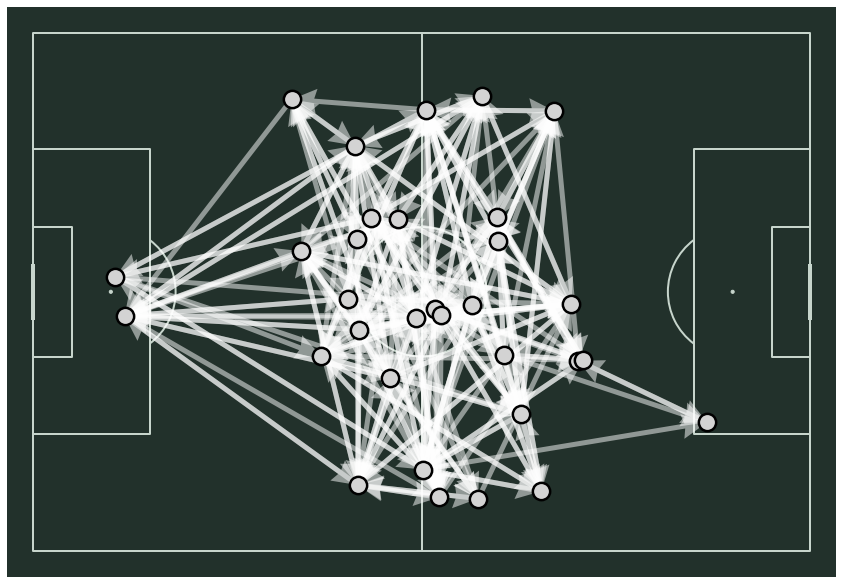

In [ ]:
#pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')

fig, ax = pitch.draw(figsize=(13, 8),
              constrained_layout=True, tight_layout=False)

#plot the arrows
arrows = pitch.arrows(1.2*passesbetweenBR.x,.8*passesbetweenBR.y,1.2*passesbetweenBR.x_end,.8*passesbetweenBR.y_end,
                     width = 5, headwidth = 5, color = 'w', ax = ax, zorder = 1, alpha = .5)

#plot the nodes
nodes = pitch.scatter(1.2*averagelocationBR.x,.8*averagelocationBR.y,
                     s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1, ax=ax)

#make annotations

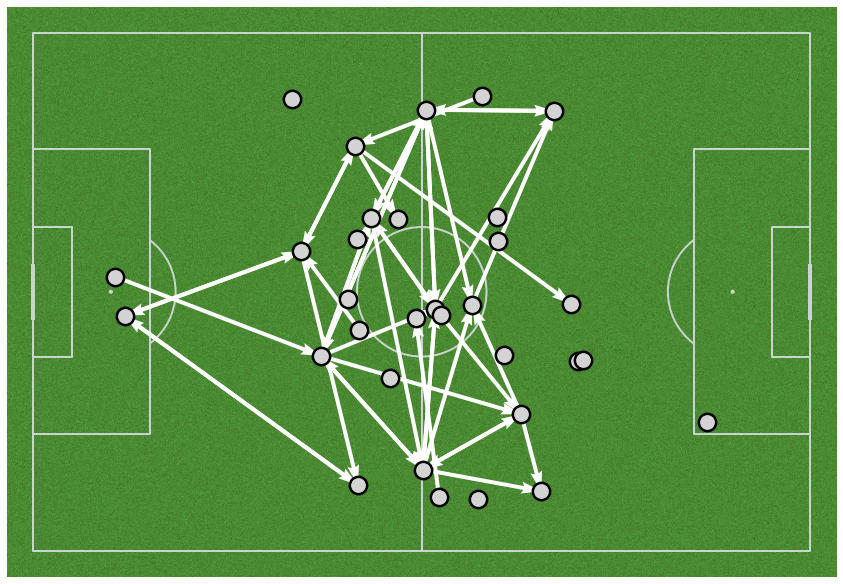

In [ ]:
#with threshold
pass_between = passesbetweenBR[passesbetweenBR['pass_count']>5]

#pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='#c7d5cc')

fig, ax = pitch.draw(figsize=(13, 8),
              constrained_layout=True, tight_layout=False)

#plot the arrows
arrows = pitch.arrows(1.2*pass_between.x,.8*pass_between.y,1.2*pass_between.x_end,.8*pass_between.y_end,ax=ax, color='white')

#plot the nodes
nodes = pitch.scatter(1.2*averagelocationBR.x,.8*averagelocationBR.y,
                      s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1, ax=ax)

In [ ]:
#servia and successfull passes
SVpass_df = passes_df[passes_df.teamId != 409]
SVpass_df = passes_df[passes_df.outcomeType != "Unsuccessful"]

ARRUMAR average location and how many times it happened

In [ ]:
#ALL anything successful
def get_passes_df(events_dict):
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)

    # create receiver column based on the next event
    # this will be correct only for successfull passes
    df["receiver"] = df["playerId"].shift(-1)

    # filter only passes
    passes_ids = df.index[df['eventType'] != 'Start']
    df_passes = df.loc[
        passes_ids, ["id", "x", "y", "endX", "endY", "teamId", "playerId", "receiver", "eventType", "outcomeType"]]

    return df_passes

In [ ]:
passarALL_df = get_passes_df(events_dict)
passarALL_df

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType
2,2.487478e+09,50.0,49.9,52.3,52.8,409,317804.0,50835.0,Pass,Successful
3,2.487478e+09,50.6,61.4,39.0,93.8,409,50835.0,100995.0,Pass,Successful
4,2.487478e+09,44.2,91.7,37.9,70.1,409,100995.0,88526.0,Pass,Successful
5,2.487478e+09,35.8,68.5,28.1,52.7,409,88526.0,28550.0,Pass,Successful
6,2.487478e+09,29.8,50.1,29.6,78.3,409,28550.0,100995.0,Pass,Successful
...,...,...,...,...,...,...,...,...,...,...
1610,2.487494e+09,0.0,0.0,NaN,NaN,409,NaN,NaN,End,Successful
1611,2.487494e+09,0.0,0.0,NaN,NaN,409,NaN,NaN,End,Successful
1612,2.487494e+09,0.0,0.0,NaN,NaN,771,NaN,NaN,End,Successful
1613,2.487463e+09,0.0,0.0,NaN,NaN,409,NaN,NaN,FormationSet,Successful



#Tutorial blog

---



---



Plot do jogo inteiro

In [ ]:
def get_passes_between_df(team_id, passes_df, players_df):
    # filter for only team
    passes_df = passes_df[passes_df["teamId"] == team_id]

    # add column with first eleven players only
    passes_df = passes_df.merge(players_df[["playerId", "isFirstEleven"]], on='playerId', how='left')
    # filter on first eleven column
    passes_df = passes_df[passes_df['isFirstEleven'] == True]

    # calculate mean positions for players
    average_locs_and_count_df = (passes_df.groupby('playerId')
                                 .agg({'x': ['mean'], 'y': ['mean', 'count']}))
    average_locs_and_count_df.columns = ['x', 'y', 'count']
    average_locs_and_count_df = average_locs_and_count_df.merge(players_df[['playerId', 'name', 'shirtNo', 'position']],
                                                                on='playerId', how='left')
    average_locs_and_count_df = average_locs_and_count_df.set_index('playerId')

    # calculate the number of passes between each position (using min/ max so we get passes both ways)
    passes_player_ids_df = passes_df.loc[:, ['id', 'playerId', 'receiver', 'teamId']]
    passes_player_ids_df['pos_max'] = (passes_player_ids_df[['playerId', 'receiver']].max(axis='columns'))
    passes_player_ids_df['pos_min'] = (passes_player_ids_df[['playerId', 'receiver']].min(axis='columns'))

    # get passes between each player
    passes_between_df = passes_player_ids_df.groupby(['pos_min', 'pos_max']).id.count().reset_index()
    passes_between_df.rename({'id': 'pass_count'}, axis='columns', inplace=True)

    # add on the location of each player so we have the start and end positions of the lines
    passes_between_df = passes_between_df.merge(average_locs_and_count_df, left_on='pos_min', right_index=True)
    passes_between_df = passes_between_df.merge(average_locs_and_count_df, left_on='pos_max', right_index=True,
                                                suffixes=['', '_end'])
    return passes_between_df, average_locs_and_count_df

In [ ]:
home_team_id = list(teams_dict.keys())[0]  # selected home team
home_passes_between_df, home_average_locs_and_count_df = get_passes_between_df(home_team_id, passes_df, players_df)

In [ ]:
away_team_id = list(teams_dict.keys())[1]  # selected home team
away_passes_between_df, away_average_locs_and_count_df = get_passes_between_df(away_team_id, passes_df, players_df)

In [ ]:
def pass_network_visualization(ax, passes_between_df, average_locs_and_count_df, flipped=False):
    MAX_LINE_WIDTH = 10
    MAX_MARKER_SIZE = 3000
    passes_between_df['width'] = (passes_between_df.pass_count / passes_between_df.pass_count.max() *
                                  MAX_LINE_WIDTH)
    average_locs_and_count_df['marker_size'] = (average_locs_and_count_df['count']
                                                / average_locs_and_count_df['count'].max() * MAX_MARKER_SIZE)

    MIN_TRANSPARENCY = 0.3
    color = np.array(to_rgba('black'))
    color = np.tile(color, (len(passes_between_df), 1))
    c_transparency = passes_between_df.pass_count / passes_between_df.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency

    pitch = Pitch(pitch_type='opta', pitch_color='grass', line_color='white', stripe=True)
    pitch.draw(ax=ax)

    if flipped:
        passes_between_df['x'] = pitch.dim.right - passes_between_df['x']
        passes_between_df['y'] = pitch.dim.right - passes_between_df['y']
        passes_between_df['x_end'] = pitch.dim.right - passes_between_df['x_end']
        passes_between_df['y_end'] = pitch.dim.right - passes_between_df['y_end']
        average_locs_and_count_df['x'] = pitch.dim.right - average_locs_and_count_df['x']
        average_locs_and_count_df['y'] = pitch.dim.right - average_locs_and_count_df['y']

    pass_lines = pitch.lines(passes_between_df.x, passes_between_df.y,
                             passes_between_df.x_end, passes_between_df.y_end, lw=passes_between_df.width,
                             color=color, zorder=1, ax=ax)
    pass_nodes = pitch.scatter(average_locs_and_count_df.x, average_locs_and_count_df.y,
                               s=average_locs_and_count_df.marker_size, marker='h',
                               color='white', edgecolors='black', linewidth=1, alpha=1, ax=ax)
    for index, row in average_locs_and_count_df.iterrows():
        player_name = row["name"].split()
        player_initials = "".join(word[0] for word in player_name).upper()
        pitch.annotate(player_initials, xy=(row.x, row.y), c='black', va='center',
                       ha='center', size=14, ax=ax)

    return pitch

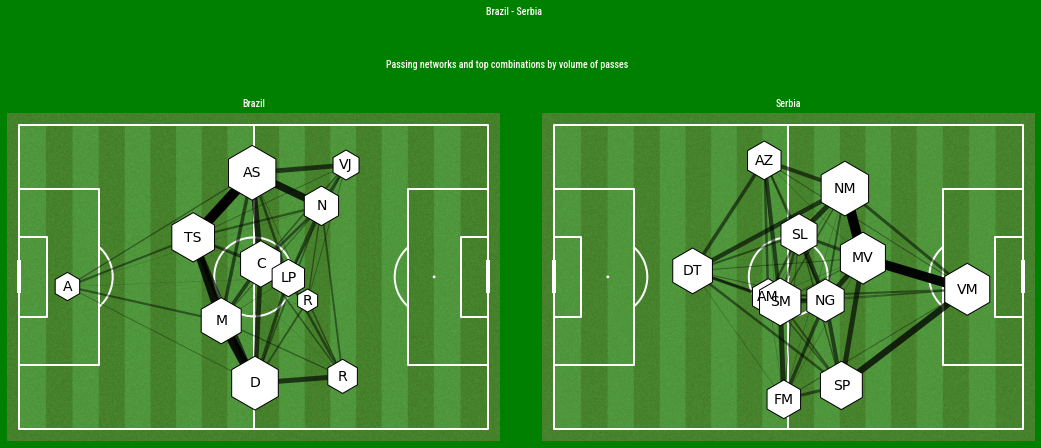

In [ ]:
# create plot
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
axes = axes.flat
plt.tight_layout()
fig.set_facecolor("green")

# plot variables
main_color = '#FBFAF5'
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "RobotoCondensed-Medium.ttf?raw=true"))

# home team viz
pass_network_visualization(axes[0], home_passes_between_df, home_average_locs_and_count_df)
axes[0].set_title(teams_dict[home_team_id], color=main_color, fontsize=14, fontproperties=font_bold.prop)

# away team viz
pass_network_visualization(axes[1], away_passes_between_df, away_average_locs_and_count_df, flipped=True)
axes[1].set_title(teams_dict[away_team_id], color=main_color, fontsize=14, fontproperties=font_bold.prop)

plt.suptitle(f"{teams_dict[home_team_id]} - {teams_dict[away_team_id]}", color=main_color, fontsize=42, fontproperties=font_bold.prop)
subtitle = "Passing networks and top combinations by volume of passes"
plt.text(-10, 120, subtitle, horizontalalignment='center', verticalalignment='center', color=main_color, fontsize=14, fontproperties=font_bold.prop)
plt.savefig('output.png', bbox_inches='tight')
plt.show()

siglas de nodes são siglas dos jogadores

#Gol

tentar fazer df da jogada com o gol usando a internet (scrapping):

In [ ]:
def get_shot_df(events_dict):
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)

    # create receiver column based on the next event
    # this will be correct only for successfull passes
    df["receiver"] = df["playerId"].shift(-1)

    # filter shots thtat scored
    shot_ids = df.index[df['eventType'] == 'Goal']
    df_shot = df.loc[
        shot_ids, ["id", "x", "y", "endX", "endY", "teamId", "playerId", "receiver", "eventType", "outcomeType"]]

    return df_shot

numero de gols na partida:

In [ ]:
shots_df = get_shot_df(events_dict)
shots_df

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType
1080,2.487490e+09,94.8,50.0,NaN,NaN,409,317804.0,115279.0,Goal,Successful
1222,2.487491e+09,86.3,49.8,NaN,NaN,409,317804.0,319756.0,Goal,Successful




---



In [ ]:
events_dict

In [ ]:
dssssf = pd.DataFrame (events_dict)
print(dssssf)
#ver o titulo de cada coluna

In [ ]:
#ver o nome de cada coluna do df
column_names = list(dssssf.columns.values)
print(column_names)

['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y', 'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers', 'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY', 'cardType', 'relatedEventId', 'relatedPlayerId', 'blockedX', 'blockedY', 'goalMouthZ', 'goalMouthY', 'isShot', 'isGoal']


In [ ]:
#show column of goals
print(dssssf['isGoal'].to_string())

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
30       NaN
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
39       NaN
40       NaN
41       NaN
42       NaN
43       NaN
44       NaN
45       NaN
46       NaN
47       NaN
48       NaN
49       NaN
50       NaN
51       NaN
52       NaN
53       NaN
54       NaN
55       NaN
56       NaN
57       NaN
58       NaN
59       NaN
60       NaN
61       NaN
62       NaN
63       NaN
64       NaN
65       NaN
66       NaN
67       NaN
68       NaN
69       NaN
70       NaN
71       NaN
72       NaN
73       NaN
74       NaN
75       NaN
76       NaN

In [ ]:
#df do jodo completo
jogodf = dssssf.loc[:, ["id",'minute','second','playerId',"x", "y", "endX", "endY", "teamId", 'type', 'x','y',"outcomeType"]]
jogodf

,id,minute,second,playerId,x,y,endX,endY,teamId,type,x,y,outcomeType
0,2.487478e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,771,"{'value': 32, 'displayName': 'Start'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1,2.487478e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,409,"{'value': 32, 'displayName': 'Start'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
2,2.487478e+09,0,0.0,317804.0,50.0,49.9,52.3,52.8,409,"{'value': 1, 'displayName': 'Pass'}",50.0,49.9,"{'value': 1, 'displayName': 'Successful'}"
3,2.487478e+09,0,2.0,50835.0,50.6,61.4,39.0,93.8,409,"{'value': 1, 'displayName': 'Pass'}",50.6,61.4,"{'value': 1, 'displayName': 'Successful'}"
4,2.487478e+09,0,6.0,100995.0,44.2,91.7,37.9,70.1,409,"{'value': 1, 'displayName': 'Pass'}",44.2,91.7,"{'value': 1, 'displayName': 'Successful'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,2.487494e+09,97,7.0,NaN,0.0,0.0,NaN,NaN,409,"{'value': 30, 'displayName': 'End'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1611,2.487494e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,409,"{'value': 30, 'displayName': 'End'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1612,2.487494e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,771,"{'value': 30, 'displayName': 'End'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1613,2.487463e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,409,"{'value': 34, 'displayName': 'FormationSet'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"


In [ ]:
jogodf.dtypes

id             float64
minute           int64
second         float64
playerId       float64
x              float64
y              float64
endX           float64
endY           float64
teamId           int64
type            object
x              float64
y              float64
outcomeType     object
dtype: object

In [ ]:
#float type to string
jogodf['type'] = jogodf['type'].astype(str)

In [ ]:
jogodf.dtypes

id             float64
minute           int64
second         float64
playerId       float64
x              float64
y              float64
endX           float64
endY           float64
teamId           int64
type            object
x              float64
y              float64
outcomeType     object
dtype: object

In [ ]:
#teste remove '
#jogodf['type'] = jogodf['type'].str.replace("'", '')

In [ ]:
#cleaning df
jogodf = jogodf.replace(["{'value': 1, 'displayName': 'Pass'}"], 'Pass')
jogodf = jogodf.replace(["{'value': 32, 'displayName': 'Start'}"], 'Start')
jogodf = jogodf.replace(["{'value': 30, 'displayName': 'End'}	"], 'End')
jogodf = jogodf.replace(["{'value': 50, 'displayName': 'Dispossessed'}"], 'Dispossessed')
jogodf = jogodf.replace(["{'value': 7, 'displayName': 'Tackle'}"], 'Tackle')
jogodf = jogodf.replace(["{'value': 61, 'displayName': 'BallTouch'}"], 'BallTouch')
jogodf = jogodf.replace(["{'value': 4, 'displayName': 'Foul'}"], 'Foul')
jogodf = jogodf.replace(["{'value': 45, 'displayName': 'Challenge'}"], 'Challenge')
jogodf = jogodf.replace(["{'value': 17, 'displayName': 'Card'}"], 'Card')
jogodf = jogodf.replace(["{'value': 12, 'displayName': 'Clearance'}"], 'Clearance')
jogodf = jogodf.replace(["{'value': 49, 'displayName': 'BallRecovery'}"], 'BallRecovery')
jogodf = jogodf.replace(["{'value': 74, 'displayName': 'BlockedPass'}"], 'BlockedPass')
jogodf = jogodf.replace(["{'value': 45, 'displayName': 'Challenge'}"], 'Challenge')
jogodf = jogodf.replace(["{'value': 15, 'displayName': 'SavedShot'}"], 'SavedShot')
jogodf = jogodf.replace(["{'value': 52, 'displayName': 'KeeperPickup'}"], 'KeeperPickup')
jogodf = jogodf.replace(["{'value': 3, 'displayName': 'TakeOn'}"], 'TakeOn')
jogodf = jogodf.replace(["{'value': 44, 'displayName': 'Aerial'}"], 'Aerial')
jogodf = jogodf.replace(["{'value': 13, 'displayName': 'MissedShots'}"], 'MissedShots')
jogodf = jogodf.replace(["{'value': 40, 'displayName': 'FormationChange'}"], 'FormationChange')
jogodf = jogodf.replace(["{'value': 19, 'displayName': 'SubstitutionOn'}"], 'SubstitutionOn')
jogodf = jogodf.replace(["{'value': 18, 'displayName': 'SubstitutionOff'}"], 'SubstitutionOff')
jogodf = jogodf.replace(["{'value': 6, 'displayName': 'CornerAwarded'}"], 'CornerAwarded')
jogodf = jogodf.replace(["{'value': 10, 'displayName': 'Save'}"], 'Save')
jogodf = jogodf.replace(["{'value': 10000, 'displayName': 'OffsideGiven'}	"], 'OffsideGiven')
jogodf = jogodf.replace(["{'value': 14, 'displayName': 'ShotOnPost'}"], 'ShotOnPost')
jogodf = jogodf.replace(["{'value': 2, 'displayName': 'OffsidePass'}"], 'OffsidePass')
jogodf = jogodf.replace(["{'value': 55, 'displayName': 'OffsideProvoked'}	"], 'OffsideProvoked')
jogodf = jogodf.replace(["{'value': 16, 'displayName': 'Goal'}"], 'Goal')
jogodf = jogodf.replace(["{'value': 45, 'displayName': 'Challenge'}"], 'Challenge')
jogodf = jogodf.replace(["{'value': 8, 'displayName': 'Interception'}"], 'Interception')
jogodf = jogodf.replace(["{'value': 74, 'displayName': 'BlockedPass'}"], 'BlockedPass')
jogodf = jogodf.replace(["{'value': 56, 'displayName': 'ShieldBallOpp'}"], 'ShieldBallOpp')

In [ ]:
jogodf

,id,minute,second,playerId,x,y,endX,endY,teamId,type,x,y,outcomeType
0,2.487478e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,771,Start,0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1,2.487478e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,409,Start,0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
2,2.487478e+09,0,0.0,317804.0,50.0,49.9,52.3,52.8,409,Pass,50.0,49.9,"{'value': 1, 'displayName': 'Successful'}"
3,2.487478e+09,0,2.0,50835.0,50.6,61.4,39.0,93.8,409,Pass,50.6,61.4,"{'value': 1, 'displayName': 'Successful'}"
4,2.487478e+09,0,6.0,100995.0,44.2,91.7,37.9,70.1,409,Pass,44.2,91.7,"{'value': 1, 'displayName': 'Successful'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,2.487494e+09,97,7.0,NaN,0.0,0.0,NaN,NaN,409,"{'value': 30, 'displayName': 'End'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1611,2.487494e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,409,"{'value': 30, 'displayName': 'End'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1612,2.487494e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,771,"{'value': 30, 'displayName': 'End'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1613,2.487463e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,409,"{'value': 34, 'displayName': 'FormationSet'}",0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"


In [ ]:
# jogodf.replace(to_replace="{'value': 1, 'displayName': 'Successful'}", value="Successful")
# jogodf
#jogodf = jogodf.replace(["{'value': 1, 'displayName': 'Successful'}"], 'Successful')
# jogodf = jogodf.replace("	{'value': 0, 'displayName': 'Unsuccessful'}", 'Unsuccessful')

In [ ]:
gol1 = jogodf.iloc[:1081]
gol1

,id,minute,second,playerId,x,y,endX,endY,teamId,type,x,y,outcomeType
0,2.487478e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,771,Start,0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1,2.487478e+09,0,0.0,NaN,0.0,0.0,NaN,NaN,409,Start,0.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
2,2.487478e+09,0,0.0,317804.0,50.0,49.9,52.3,52.8,409,Pass,50.0,49.9,"{'value': 1, 'displayName': 'Successful'}"
3,2.487478e+09,0,2.0,50835.0,50.6,61.4,39.0,93.8,409,Pass,50.6,61.4,"{'value': 1, 'displayName': 'Successful'}"
4,2.487478e+09,0,6.0,100995.0,44.2,91.7,37.9,70.1,409,Pass,44.2,91.7,"{'value': 1, 'displayName': 'Successful'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2.487490e+09,61,51.0,88526.0,65.8,40.5,71.9,53.2,409,Pass,65.8,40.5,"{'value': 1, 'displayName': 'Successful'}"
1077,2.487490e+09,61,55.0,50835.0,90.9,67.1,NaN,NaN,409,BallTouch,90.9,67.1,"{'value': 1, 'displayName': 'Successful'}"
1078,2.487490e+09,61,56.0,337782.0,90.4,67.5,NaN,NaN,409,SavedShot,90.4,67.5,"{'value': 1, 'displayName': 'Successful'}"
1079,2.487490e+09,61,57.0,149474.0,2.5,47.8,NaN,NaN,771,Save,2.5,47.8,"{'value': 1, 'displayName': 'Successful'}"


{409: 'Brazil', 771: 'Serbia'}

index 1036	serbian goalkeeper has the ball KeeperPickup

Pass from 60:24min until goal at 61:58min

In [ ]:
gol1 = gol1.iloc[1036:1081]
gol1

,id,minute,second,playerId,x,y,endX,endY,teamId,type,x,y,outcomeType
1036,2.487489e+09,60,24.0,149474.0,14.5,72.7,NaN,NaN,771,KeeperPickup,14.5,72.7,"{'value': 1, 'displayName': 'Successful'}"
1037,2.487489e+09,60,25.0,149474.0,14.3,73.9,39.1,92.9,771,Pass,14.3,73.9,"{'value': 1, 'displayName': 'Successful'}"
1038,2.487489e+09,60,28.0,100615.0,42.5,89.9,39.5,66.4,771,Pass,42.5,89.9,"{'value': 1, 'displayName': 'Successful'}"
1039,2.487489e+09,60,30.0,401042.0,39.4,66.4,35.8,60.9,771,Pass,39.4,66.4,"{'value': 1, 'displayName': 'Successful'}"
1040,2.487489e+09,60,33.0,297395.0,33.8,54.5,35.1,15.6,771,Pass,33.8,54.5,"{'value': 1, 'displayName': 'Successful'}"
1041,2.487489e+09,60,36.0,319785.0,31.7,14.7,14.0,50.7,771,Pass,31.7,14.7,"{'value': 1, 'displayName': 'Successful'}"
1042,2.487489e+09,60,40.0,149474.0,14.3,56.6,21.3,90.6,771,Pass,14.3,56.6,"{'value': 1, 'displayName': 'Successful'}"
1043,2.487490e+09,60,43.0,383864.0,18.9,85.1,4.2,77.0,771,Pass,18.9,85.1,"{'value': 1, 'displayName': 'Successful'}"
1044,2.487490e+09,60,47.0,149474.0,4.1,80.9,37.8,92.3,771,Pass,4.1,80.9,"{'value': 0, 'displayName': 'Unsuccessful'}"
1045,2.487490e+09,60,49.0,88300.0,64.7,7.5,NaN,NaN,409,BallRecovery,64.7,7.5,"{'value': 1, 'displayName': 'Successful'}"


In [ ]:
# #create reciever column
# gol1['receiver'] = gol1.loc[:, 'playerId']
# gol1

In [ ]:
gol1.loc[:, 'receiver'] = gol1.playerId.shift(-1)
gol1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,id,minute,second,playerId,x,y,endX,endY,teamId,type,x,y,outcomeType,receiver
1036,2.487489e+09,60,24.0,149474.0,14.5,72.7,NaN,NaN,771,KeeperPickup,14.5,72.7,"{'value': 1, 'displayName': 'Successful'}",149474.0
1037,2.487489e+09,60,25.0,149474.0,14.3,73.9,39.1,92.9,771,Pass,14.3,73.9,"{'value': 1, 'displayName': 'Successful'}",100615.0
1038,2.487489e+09,60,28.0,100615.0,42.5,89.9,39.5,66.4,771,Pass,42.5,89.9,"{'value': 1, 'displayName': 'Successful'}",401042.0
1039,2.487489e+09,60,30.0,401042.0,39.4,66.4,35.8,60.9,771,Pass,39.4,66.4,"{'value': 1, 'displayName': 'Successful'}",297395.0
1040,2.487489e+09,60,33.0,297395.0,33.8,54.5,35.1,15.6,771,Pass,33.8,54.5,"{'value': 1, 'displayName': 'Successful'}",319785.0
1041,2.487489e+09,60,36.0,319785.0,31.7,14.7,14.0,50.7,771,Pass,31.7,14.7,"{'value': 1, 'displayName': 'Successful'}",149474.0
1042,2.487489e+09,60,40.0,149474.0,14.3,56.6,21.3,90.6,771,Pass,14.3,56.6,"{'value': 1, 'displayName': 'Successful'}",383864.0
1043,2.487490e+09,60,43.0,383864.0,18.9,85.1,4.2,77.0,771,Pass,18.9,85.1,"{'value': 1, 'displayName': 'Successful'}",149474.0
1044,2.487490e+09,60,47.0,149474.0,4.1,80.9,37.8,92.3,771,Pass,4.1,80.9,"{'value': 0, 'displayName': 'Unsuccessful'}",88300.0
1045,2.487490e+09,60,49.0,88300.0,64.7,7.5,NaN,NaN,409,BallRecovery,64.7,7.5,"{'value': 1, 'displayName': 'Successful'}",88300.0


In [ ]:
#adicionar coluna passe com nome
nameplayer = ['Vanja Savic', 'Vanja Savic', 'Filip Mladenovic', 'Ivan Ilic','Sasa Lukic', 'Nikola Milenkovic','Vanja Savic','Strahinja Pavlovic','Vanja Savic','Danilo','Danilo','Filip Mladenovic','Ivan Ilic','Ivan Ilic','Vanja Savic',
              'Thiago Silva', 'Marquinhos','Marquinhos','Alex Sandro','Neymar','Alex Sandro','Casemiro','Danilo','Raphinha','Thiago Silva','Alex Sandro',
              'Marquinhos','Alex Sandro','Vinícius Junior','Casemiro', 'Danilo','Filip Mladenovic','Raphinha','Raphinha','Neymar','Sergej Savic', 'Sergej Savic', 'Thiago Silva','Thiago Silva','Danilo','Casemiro','Neymar','Vinícius Junior', 'Vanja Savic','Richarlison']

gol1['nameplayer'] = nameplayer

<ipython-input-37-1466c641b1b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gol1['nameplayer'] = nameplayer


In [ ]:
#adicionar coluna receiver nome
namereceiver = ['Vanja Savic', 'Filip Mladenovic', 'Ivan Ilic','Sasa Lukic', 'Nikola Milenkovic','Vanja Savic','Strahinja Pavlovic','Vanja Savic','Danilo','Danilo','Filip Mladenovic','Ivan Ilic','Ivan Ilic','Vanja Savic',
              'Thiago Silva', 'Marquinhos','Marquinhos','Alex Sandro','Neymar','Alex Sandro','Casemiro','Danilo','Raphinha','Thiago Silva','Alex Sandro',
              'Marquinhos','Alex Sandro','Vinícius Junior','Casemiro', 'Danilo','Filip Mladenovic','Raphinha','Raphinha','Neymar','Sergej Savic', 'Sergej Savic', 'Thiago Silva','Thiago Silva','Danilo','Casemiro','Neymar','Vinícius Junior', 'Vanja Savic','Richarlison','Vanja Savic']

gol1['namereceiver'] = namereceiver

<ipython-input-38-5cda4117b5fa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gol1['namereceiver'] = namereceiver


In [ ]:
#save as csv
gol1.to_csv('golser1.csv')

gol2

In [ ]:
#1222
gol2= jogodf.iloc[1211:1223]
gol2

,id,minute,second,playerId,x,y,endX,endY,teamId,type,x,y,outcomeType
1211,2.487491e+09,71,53.0,319785.0,12.5,28.9,NaN,NaN,771,BallRecovery,12.5,28.9,"{'value': 1, 'displayName': 'Successful'}"
1212,2.487491e+09,71,54.0,319785.0,12.5,28.9,13.4,13.4,771,Pass,12.5,28.9,"{'value': 1, 'displayName': 'Successful'}"
1213,2.487491e+09,71,57.0,401042.0,15.3,12.8,24.3,32.4,771,Pass,15.3,12.8,"{'value': 1, 'displayName': 'Successful'}"
1214,2.487491e+09,72,0.0,288767.0,27.6,33.3,67.6,100.0,771,Pass,27.6,33.3,"{'value': 0, 'displayName': 'Unsuccessful'}"
1215,2.487491e+09,72,33.0,88300.0,24.0,0.0,40.3,7.6,409,Pass,24.0,0.0,"{'value': 1, 'displayName': 'Successful'}"
1216,2.487491e+09,72,35.0,300447.0,40.8,8.1,57.8,68.3,409,Pass,40.8,8.1,"{'value': 0, 'displayName': 'Unsuccessful'}"
1217,2.487491e+09,72,39.0,38442.0,38.7,31.0,63.7,32.5,771,Pass,38.7,31.0,"{'value': 0, 'displayName': 'Unsuccessful'}"
1218,2.487491e+09,72,43.0,100995.0,44.6,71.0,61.9,95.3,409,Pass,44.6,71.0,"{'value': 1, 'displayName': 'Successful'}"
1219,2.487491e+09,72,45.0,337782.0,64.3,95.6,61.1,85.7,409,Pass,64.3,95.6,"{'value': 1, 'displayName': 'Successful'}"
1220,2.487491e+09,72,49.0,50835.0,66.3,87.7,80.3,92.2,409,Pass,66.3,87.7,"{'value': 1, 'displayName': 'Successful'}"


In [ ]:
gol2.to_csv('gols2.csv')

In [ ]:
dfBU1 = pd.read_csv("/content/gols2 - g2222.csv")
print(dfBU1)

           playerId     x     y   endX  endY         receiver
0            Danilo  24.0   0.0   40.8   8.1          Rapinha
1           Rapinha  40.8   8.1   38.7  31.0    Darko Lazovic
2     Darko Lazovic  38.7  31.0   44.6  71.0      Alex Sandro
3       Alex Sandro  44.6  71.0   64.3  95.6  Vinícius Júnior
4   Vinícius Júnior  64.3  95.6   66.3  87.7           Neymar
5            Neymar  66.3  87.7   87.9  75.0  Vinícius Júnior
6  Vinícius 2Júnior  87.9  75.0   86.3  49.8      Richarlison
7       Richarlison  86.3  49.8  100.0  48.0              GOL


In [ ]:
id=[]
for i in range(8):
  id.append(1)

len(id)

8

In [ ]:
dfBU1['pass_count'] = id

In [ ]:
#find average location for all players in df dataframe
averagelocationBR1 = dfBU1.groupby('playerId').agg({'x':['mean'],'y':['mean','count']})
averagelocationBR1.columns = ['x','y','count']

averagelocasstionBR = dfBU1.groupby('receiver').agg({'endX':['mean'],'endY':['mean','count']})
averagelocasstionBR.columns = ['x','y','count']

averagelocationBR = pd.concat([averagelocationBR1,averagelocasstionBR])

MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
dfBU1['width'] = (dfBU1.pass_count / dfBU1.pass_count.max() *
                           MAX_LINE_WIDTH)
averagelocationBR['marker_size'] = (averagelocationBR['count']
                                         / averagelocationBR['count'].max() * MAX_MARKER_SIZE)

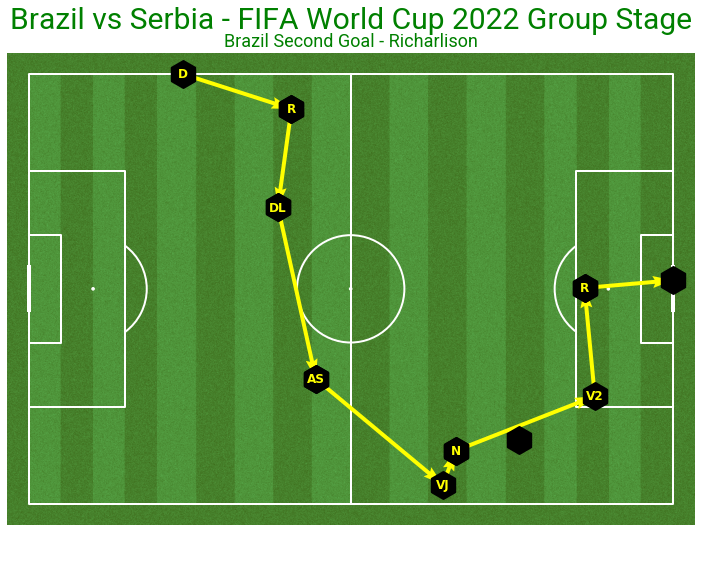

In [ ]:
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')


#opta
#pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True)
fig, axs = pitch.grid(figheight=8, title_height=0.08, endnote_space=0,
                      axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0.05)
#fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)

#plot the arrows
arrows = pitch.arrows(1.2*dfBU1.x,.8*dfBU1.y,1.2*dfBU1.endX,.8*dfBU1.endY,lw=dfBU1.width,zorder=1, ax=axs['pitch'], color='yellow')

#plot the nodes
nodes = pitch.scatter(1.2*averagelocationBR.x,.8*averagelocationBR.y,marker='h',
                      s = 700, color = 'black', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1, ax=axs['pitch'])

for index, row in dfBU1.iterrows():
    player_name = row["playerId"].split()
    player_initials = "".join(word[0] for word in player_name).upper()
    pitch.annotate(player_initials, xy=(1.2*row.x, 0.8*row.y), c='yellow', va='center',
                       ha='center', weight='bold',size=12, ax=axs['pitch'])


URL = 'https://raw.githubusercontent.com/google/fonts/main/apache/roboto/Roboto%5Bwdth,wght%5D.ttf'
robotto_regular = FontManager(URL)

# endnote /title
# axs['endnote'].text(1, 0.5, '@your_twitter_handle', color='#c7d5cc',
#                     va='center', ha='right', fontsize=15,
#                     fontproperties=robotto_regular.prop)
TITLE_TEXT = f'Brazil vs Serbia - FIFA World Cup 2022 Group Stage'
axs['title'].text(0.5, 0.7, TITLE_TEXT, color='green',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=30)
axs['title'].text(0.5, 0.25, 'Brazil Second Goal - Richarlison', color='green',
                  va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=18)

# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_pass_network_002.png'
plt.savefig('brsr2.png', bbox_inches='tight')
plt.show()  # If you are using a Jupyter notebook you do not need this line